# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 73569.43 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 101713.94 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 121202.19 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 132997.74 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 140717.25 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 147683.56 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 63513.19 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 93693.65 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 119220.66 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 132464.94 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 142473.53 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 148990.98 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 16.91 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.90 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.69 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.10 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.37 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.67 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.19 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.54 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.38 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.72 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.92 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.56 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.18 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.64 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.53 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.80 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.12 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.76 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.44 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.25 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.18 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.43 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.43 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.56 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.38 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.91 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.21 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.62 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.82 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 36.13 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.78 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.43 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 34.16 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.03 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 41.85 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 43.69 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 43.48 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.30 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.98 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.90 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.24 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.68 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.56 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.73 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.21 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.10 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.73 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.76 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.30 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.87 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.69 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.13 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.39 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 45.13 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 45.98 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 46.24 examples/s]

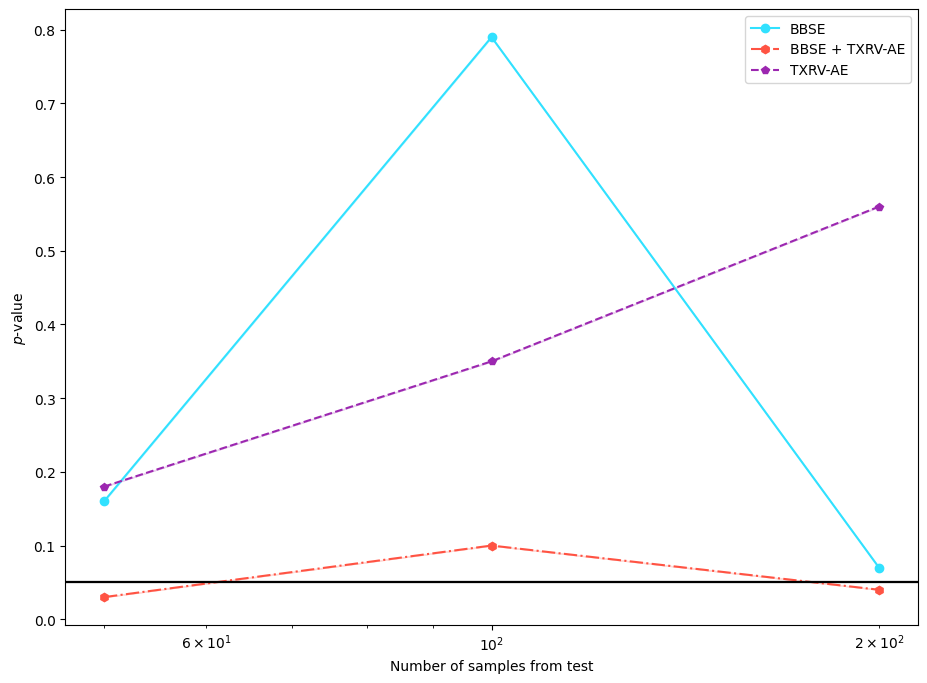

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.98 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.37 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.37 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.32 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.91 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.34 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.06 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.50 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.12 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.60 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.08 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.47 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.59 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.17 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.69 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.85 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.62 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.34 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.94 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.43 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.63 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.24 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.01 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.43 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.92 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.61 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.60 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.38 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.92 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.58 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.82 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.72 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.58 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.43 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.01 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.15 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.35 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.14 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.99 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.58 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.51 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.47 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.30 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.90 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.43 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.62 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.75 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.77 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.70 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.82 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.00 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.62 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.13 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.74 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.86 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.23 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.80 examples/s]

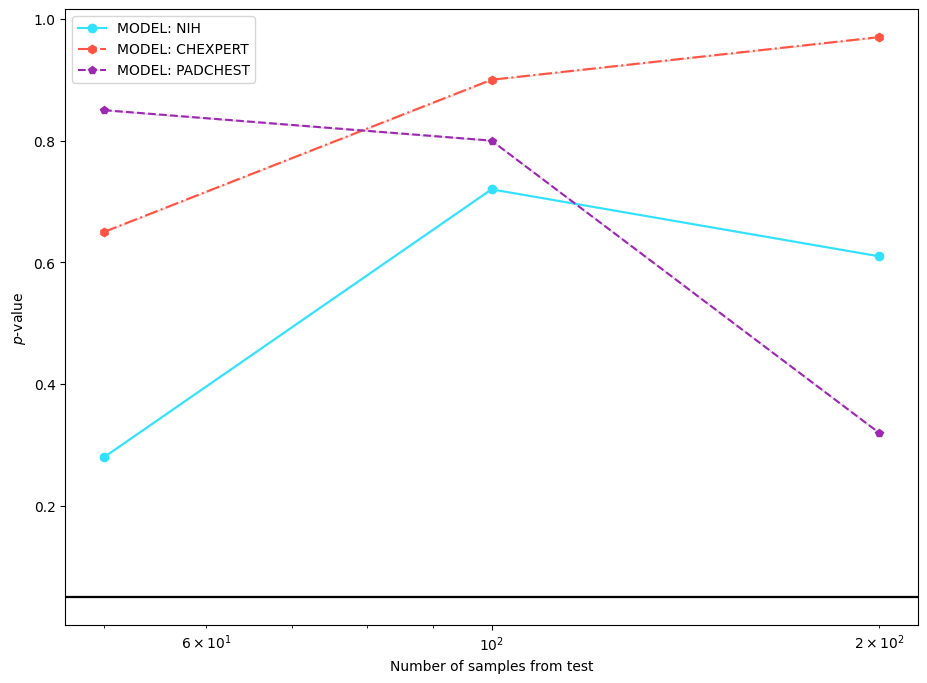

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 60471.48 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 81960.05 examples/s]

Filter (num_proc=6):  48%|████▊     | 54374/112120 [00:00<00:00, 97663.60 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 122169.73 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 123788.42 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 131914.03 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 59703.93 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 86920.83 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 101756.13 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 106052.35 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 122695.75 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 125973.47 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.63 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.44 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.64 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.85 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.48 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.29 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.05 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.91 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.89 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.94 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.41 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.26 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.54 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.34 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.19 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.32 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.09 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.60 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.74 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 56154.44 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 82856.65 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 99090.58 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 107352.54 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 115605.20 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 121716.10 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54929.19 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 83134.33 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 99318.19 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 110078.78 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 116582.61 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 121325.88 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.14 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.77 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.20 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.43 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.81 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.34 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.05 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.76 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.99 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.90 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.90 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.89 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.70 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.40 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.20 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.68 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.32 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.01 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54069.00 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 85813.65 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 101013.79 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 111257.10 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 117664.44 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 126198.80 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 57623.62 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 86362.65 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 99727.82 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 108630.36 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 115353.45 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 122005.65 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.00 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.15 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.47 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.66 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.78 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.19 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.33 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.68 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.54 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.60 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.12 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.17 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.93 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.64 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.90 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.20 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.91 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.01 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 55124.71 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76014.87 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 96195.27 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 106628.86 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 114180.75 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 120851.49 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 55964.02 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 80702.19 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 101993.38 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 110867.95 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 116244.01 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 120903.58 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.45 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.82 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.37 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.41 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.97 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.06 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.79 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.67 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.72 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.24 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.66 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.10 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.84 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.02 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.68 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.59 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.49 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.10 examples/s]

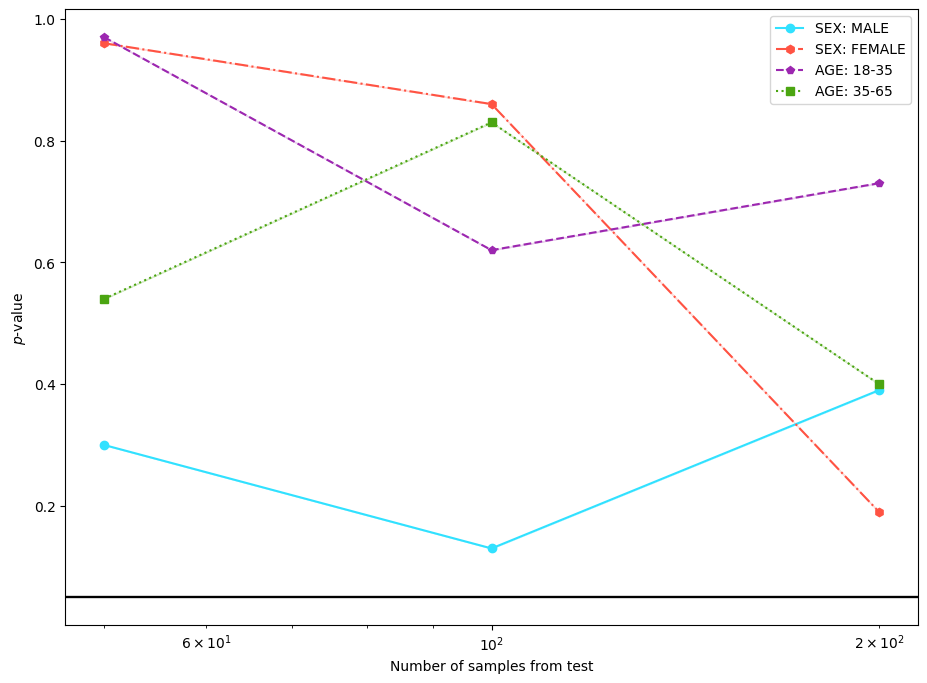

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.38 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.41 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.77 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.98 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.37 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.49 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.22 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.71 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.42 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.68 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.51 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.14 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.42 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.35 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.64 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.70 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.95 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.31 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.32 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.22 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.02 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.79 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.95 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.98 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.95 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.90 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.14 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.01 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.46 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.09 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.96 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.33 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.25 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.52 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.24 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.67 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.96 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.33 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.48 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.13 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.58 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.17 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.40 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.33 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.73 examples/s]

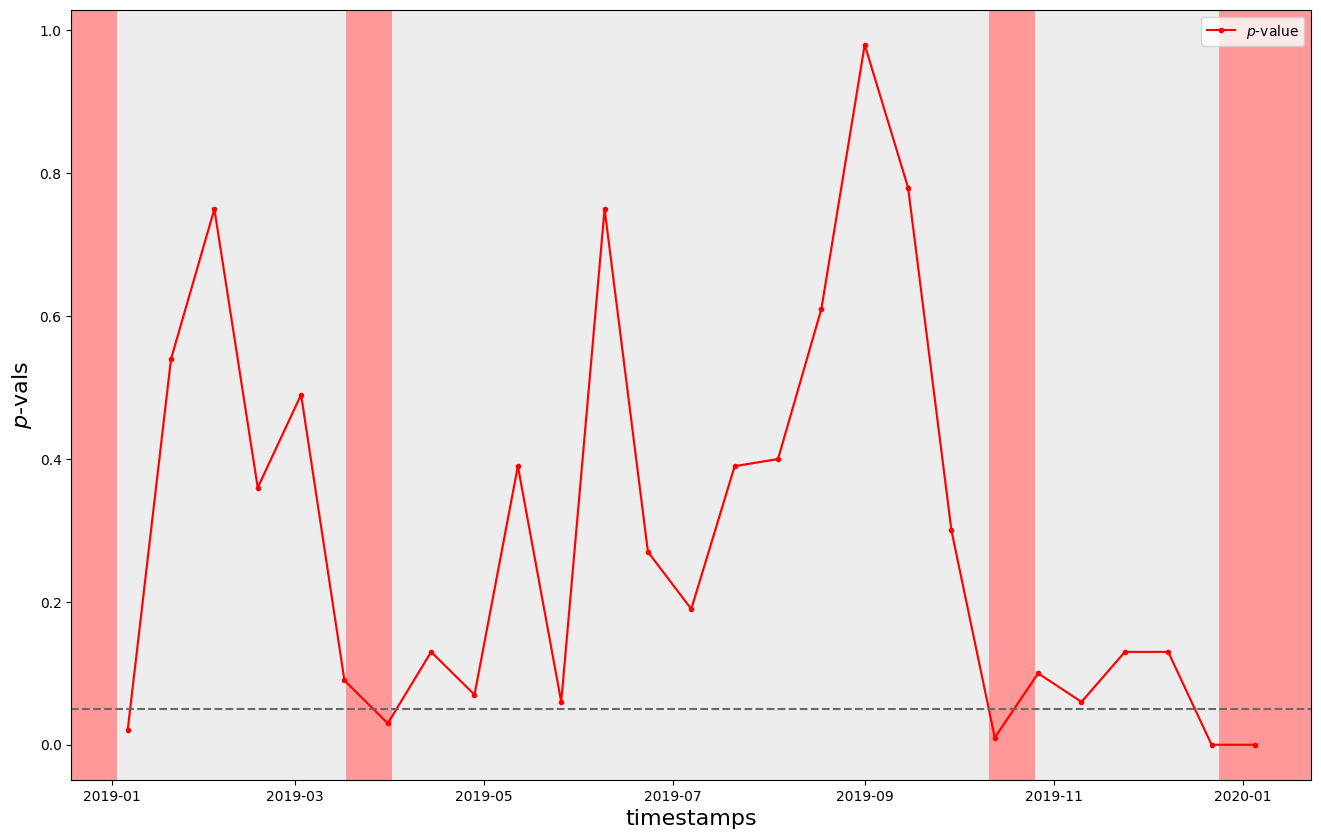

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)